In [1]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression



In [2]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('../../Dataset/ACB-Historical-Data_Group 9.csv', index_col='Date', parse_dates=True)

# Tiền xử lí dữ liệu


In [3]:
# 3. Chuyển các giá trị trong cột về number
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,11361.0,11285.2,11398.8,11171.6,3910000,0.0101
2019-03-04,11512.4,11361.0,11550.3,11323.1,8240000,0.0133
2019-03-05,11474.6,11512.4,11626.0,11398.8,6510000,-0.0033
2019-03-06,11474.6,11436.7,11512.4,11361.0,3110000,0.0000
2019-03-07,11550.3,11512.4,11626.0,11474.6,8720000,0.0066
...,...,...,...,...,...,...
2024-05-27,29450.0,29500.0,29850.0,29250.0,7540000,0.0068
2024-05-28,29650.0,29700.0,29700.0,29300.0,10690000,0.0068
2024-05-29,29250.0,29700.0,29750.0,29250.0,13450000,-0.0135


In [4]:
# 4. Loại các giá trị null
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

In [5]:
# 5. Chia train test
df = data
df = df[['Price']]
# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size 

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [6]:
# 6. Chạy auto Arima
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=12,  
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=18028.507, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=17669.609, Time=0.78 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=18029.369, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=17523.861, Time=1.48 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.86 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=17524.133, Time=0.61 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=17519.698, Time=2.21 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=17665.494, Time=1.10 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=8.92 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.57 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=17520.717, Time=1.96 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AI

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1177
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -8754.849
Date:                            Thu, 06 Jun 2024   AIC                          17519.698
Time:                                    16:06:51   BIC                          17544.996
Sample:                                         0   HQIC                         17529.242
                                           - 1177                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0379      0.019     -1.979      0.048      -0.075      -0.000
ar.L2          0.0720      0.019      3.749      0.000       0.034       0.110
ar.S.L12      -0.6931      0.016    -43.946      0.000      -0.724      -0.662
ar.S.L24      -0.3411      0.018    -18.977      0.000      -0.376      -0.306
sigma2      1.973e+05   3542.477     55.688      0.000     1.9e+05    2.04e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5662.18
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.11   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# 7. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [9]:
# 8. Dự đoán 30 ngày tiếp theo
last_index_30 =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index_30, stop=last_index_30+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index_30+1, last_index_30+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
1177    23305.990522
1178    23500.536856
1179    23303.562325
1180    23159.016895
1181    23163.784633
1182    23343.386691
1183    23370.106308
1184    23562.862147
1185    23398.970887
1186    23599.968522
1187    23680.768256
1188    23714.253546
1189    23769.429730
1190    24024.345433
1191    23739.448804
1192    23662.601034
1193    23662.980331
1194    23930.366340
1195    23884.686812
1196    23891.046959
1197    23585.441866
1198    23888.629805
1199    24021.728152
1200    24083.716498
1201    24170.984863
1202    24556.485076
1203    24314.438922
1204    24291.148688
1205    24258.829929
1206    24642.897260
dtype: float64


In [10]:
# 9. Dự đoán 60 ngày tiếp theo
last_index_60 =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index_60, stop=last_index_60+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index_60+1, last_index_60+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
1177    23305.990522
1178    23500.536856
1179    23303.562325
1180    23159.016895
1181    23163.784633
1182    23343.386691
1183    23370.106308
1184    23562.862147
1185    23398.970887
1186    23599.968522
1187    23680.768256
1188    23714.253546
1189    23769.429730
1190    24024.345433
1191    23739.448804
1192    23662.601034
1193    23662.980331
1194    23930.366340
1195    23884.686812
1196    23891.046959
1197    23585.441866
1198    23888.629805
1199    24021.728152
1200    24083.716498
1201    24170.984863
1202    24556.485076
1203    24314.438922
1204    24291.148688
1205    24258.829929
1206    24642.897260
1207    24552.999784
1208    24571.626382
1209    24437.209088
1210    24686.284782
1211    24943.194295
1212    24991.060754
1213    25039.307046
1214    25313.704584
1215    25071.951681
1216    24988.446592
1217    24980.288042
1218    25253.537050
1219    25218.984949
1220    25292.695286
1221    25087.970191
1222    

In [11]:
# 10. Dự đoán 90 ngày tiếp theo
last_index_90 =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index_90, stop=last_index_90+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index_90+1, last_index_90+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
1177    23305.990522
1178    23500.536856
1179    23303.562325
1180    23159.016895
1181    23163.784633
            ...     
1262    27836.418959
1263    27585.935237
1264    27525.346984
1265    27510.234439
1266    27822.037455
Length: 90, dtype: float64


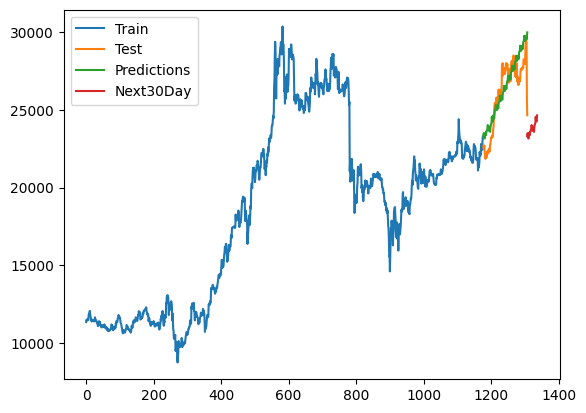

In [12]:
#11. Vẽ đồ thị các giá trị từ train tới test và dự đoán 30 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

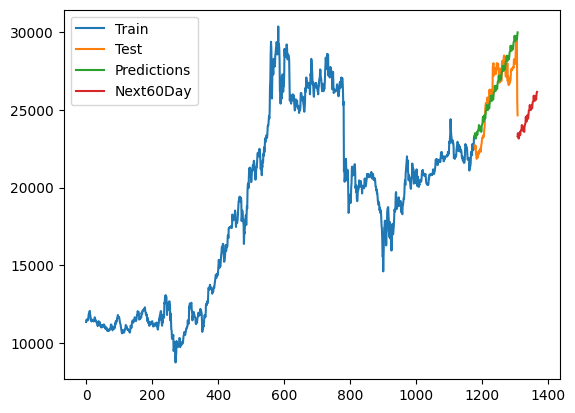

In [13]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 60 ngày sau

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

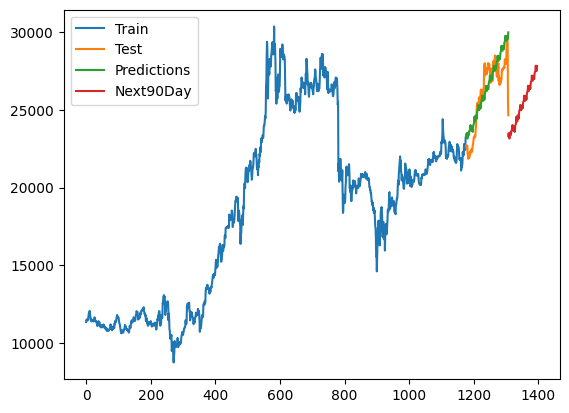

In [14]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 90 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

In [15]:
#13. Đánh giá mô hình

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Tính toán RMSE, MAPE và MAE cho tập test
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 1238.244890917306
Testing MAPE: 3.8899008295323285
Testing MAE: 997.3810920674987
